<a href="https://colab.research.google.com/github/PratamaRizki22/fuzzyKualitasTanah/blob/master/fuzzy_kualitas_tanah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rizki Purnomo Pratama(5220411070)

In [ ]:
!pip install -U scikit-fuzzy
!pip install tabulate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.9 MB/s eta 0:00:00


In [ ]:
# -*- coding: utf-8 -*-
"""hitung_kualitas_tanah_fuzzy

Sistem fuzzy untuk menentukan kualitas tanah berdasarkan parameter:
- pH
- Kandungan Nutrisi (mg/kg)
- Kandungan Logam Berat (mg/kg)
- Kandungan Bahan Organik (%)
"""

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import warnings

warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')
import matplotlib.pyplot as plt

# Library

## Mendefinisikan Variabel Input dan Output (Antecedents & Consequents)

In [ ]:
# Input
ph = ctrl.Antecedent(np.arange(0, 14.1, 0.1), 'ph')
nutrisi = ctrl.Antecedent(np.arange(0, 301, 1), 'nutrisi')
logam_berat = ctrl.Antecedent(np.arange(0, 31, 1), 'logam_berat')
bahan_organik = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'bahan_organik')

# Output
kualitas_tanah = ctrl.Consequent(np.arange(0, 101, 1), 'kualitas_tanah')

# pH
ph['asam'] = fuzz.trapmf(ph.universe, [0, 0, 5.5, 6.5])      # < 6.0 dengan overlap
ph['normal'] = fuzz.trimf(ph.universe, [5.5, 6.5, 7.5])      # 6.0-7.0 dengan overlap
ph['basa'] = fuzz.trapmf(ph.universe, [6.5, 7.5, 14, 14])    # > 7.0 dengan overlap

# Kandungan Nutrisi
nutrisi['rendah'] = fuzz.trapmf(nutrisi.universe, [0, 0, 80, 120])      # < 100 dengan overlap
nutrisi['sedang'] = fuzz.trimf(nutrisi.universe, [80, 150, 220])        # 100-200 dengan overlap
nutrisi['tinggi'] = fuzz.trapmf(nutrisi.universe, [180, 220, 300, 300]) # > 200 dengan overlap

# Kandungan Logam Berat
logam_berat['rendah'] = fuzz.trapmf(logam_berat.universe, [0, 0, 8, 12])      # < 10 dengan overlap
logam_berat['sedang'] = fuzz.trimf(logam_berat.universe, [8, 15, 22])         # 10-20 dengan overlap
logam_berat['tinggi'] = fuzz.trapmf(logam_berat.universe, [18, 22, 30, 30])   # > 20 dengan overlap

# Kandungan Bahan Organik
bahan_organik['rendah'] = fuzz.trapmf(bahan_organik.universe, [0, 0, 1.5, 2.5])  # < 2% dengan overlap
bahan_organik['sedang'] = fuzz.trimf(bahan_organik.universe, [1.5, 3.5, 5.5])    # 2-5% dengan overlap
bahan_organik['tinggi'] = fuzz.trapmf(bahan_organik.universe, [4.5, 5.5, 10, 10]) # > 5% dengan overlap

# Kualitas Tanah
kualitas_tanah['buruk'] = fuzz.trapmf(kualitas_tanah.universe, [0, 0, 30, 50])    # 0-50
kualitas_tanah['sedang'] = fuzz.trapmf(kualitas_tanah.universe, [40, 50, 60, 70]) # 50-70
kualitas_tanah['baik'] = fuzz.trapmf(kualitas_tanah.universe, [60, 70, 100, 100]) # 70-100

## visualisasi


Menampilkan grafik fungsi keanggotaan...


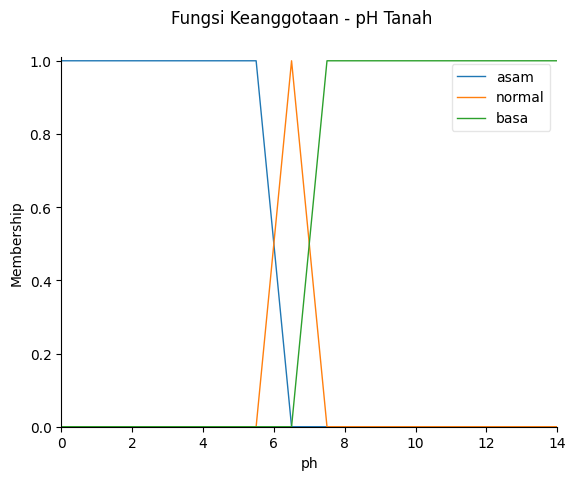

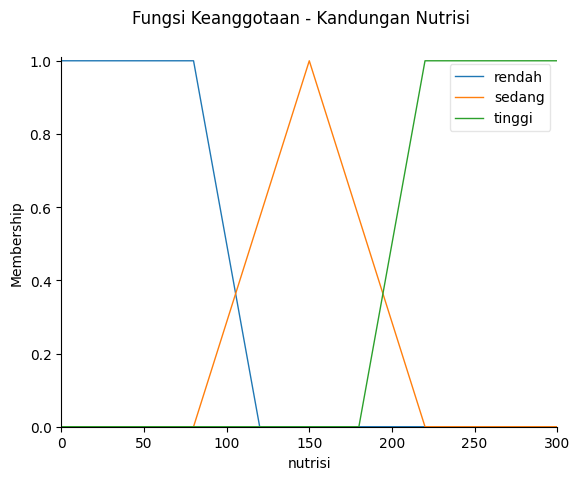

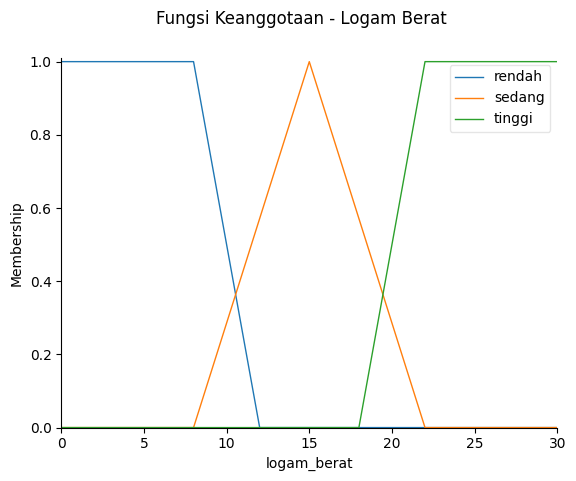

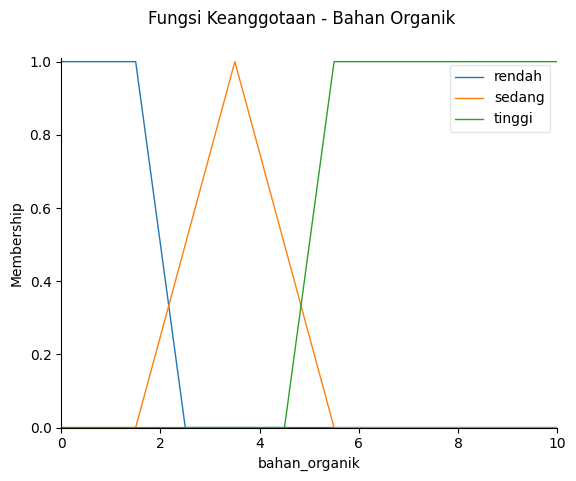

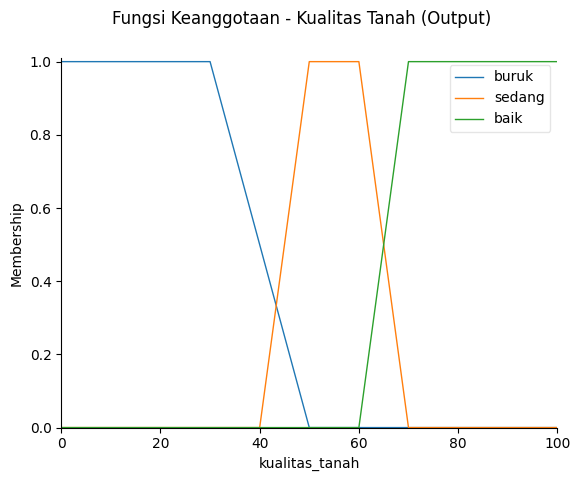

In [ ]:

print("\nMenampilkan grafik fungsi keanggotaan...")

ph.view()
plt.suptitle('Fungsi Keanggotaan - pH Tanah')
plt.show()

nutrisi.view()
plt.suptitle('Fungsi Keanggotaan - Kandungan Nutrisi')
plt.show()

logam_berat.view()
plt.suptitle('Fungsi Keanggotaan - Logam Berat')
plt.show()

bahan_organik.view()
plt.suptitle('Fungsi Keanggotaan - Bahan Organik')
plt.show()

kualitas_tanah.view()
plt.suptitle('Fungsi Keanggotaan - Kualitas Tanah (Output)')
plt.show()


## aturan fuzzy

In [ ]:
# Aturan Fuzzy
rule1 = ctrl.Rule(ph['normal'] & nutrisi['tinggi'] & logam_berat['rendah'], kualitas_tanah['baik'])
rule2 = ctrl.Rule((ph['asam'] | ph['basa']) & nutrisi['rendah'] & logam_berat['tinggi'], kualitas_tanah['buruk'])
rule3 = ctrl.Rule(ph['normal'] & nutrisi['sedang'] & logam_berat['sedang'], kualitas_tanah['sedang'])
rule4 = ctrl.Rule(bahan_organik['tinggi'], kualitas_tanah['baik'])
rule5 = ctrl.Rule(bahan_organik['rendah'] & logam_berat['tinggi'], kualitas_tanah['buruk'])
rule6 = ctrl.Rule(ph['normal'] & nutrisi['tinggi'] & logam_berat['sedang'], kualitas_tanah['sedang'])

In [ ]:
# Sistem Kontrol
sistem_kontrol = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
simulasi = ctrl.ControlSystemSimulation(sistem_kontrol)

# manual

## Fungsi segitiga dan trapesium

In [ ]:
def trimf(x, abc):
    a, b, c = abc
    if x <= a or x >= c:
        return 0.0
    elif a < x <= b:
        return (x - a) / (b - a)
    elif b < x < c:
        return (c - x) / (c - b)
    return 0.0

def trapmf(x, abcd):
    a, b, c, d = abcd
    if x <= a or x >= d:
        return 0.0
    elif a < x <= b:
        return (x - a) / (b - a)
    elif b < x <= c:
        return 1.0
    elif c < x < d:
        return (d - x) / (d - c)
    return 0.0

## perhitungan manual

In [ ]:
def hitung_membership_input(inputs):
    print("=" * 80)
    print("                    PERHITUNGAN FUZZIFICATION")
    print("=" * 80)
    print("\n📌 DETAIL PERHITUNGAN SETIAP VARIABEL INPUT:")

    # pH
    print(f"\n1. pH = {inputs['ph']}")
    print("-" * 50)
    asam = trapmf(inputs['ph'], [0, 0, 5.5, 6.5])
    normal = trimf(inputs['ph'], [5.5, 6.5, 7.5])
    basa = trapmf(inputs['ph'], [6.5, 7.5, 14, 14])
    print(f"   μ_asam({inputs['ph']})  = trapmf({inputs['ph']}, [0, 0, 5.5, 6.5])  = {asam:.3f}")
    print(f"   μ_normal({inputs['ph']}) = trimf({inputs['ph']}, [5.5, 6.5, 7.5])   = {normal:.3f}")
    print(f"   μ_basa({inputs['ph']}) = trapmf({inputs['ph']}, [6.5, 7.5, 14, 14]) = {basa:.3f}")

    # Nutrisi
    print(f"\n2. KANDUNGAN NUTRISI = {inputs['nutrisi']}")
    print("-" * 50)
    rendah_n = trapmf(inputs['nutrisi'], [0, 0, 80, 120])
    sedang_n = trimf(inputs['nutrisi'], [80, 150, 220])
    tinggi_n = trapmf(inputs['nutrisi'], [180, 220, 300, 300])
    print(f"   μ_rendah({inputs['nutrisi']})  = trapmf({inputs['nutrisi']}, [0, 0, 80, 120])  = {rendah_n:.3f}")
    print(f"   μ_sedang({inputs['nutrisi']}) = trimf({inputs['nutrisi']}, [80, 150, 220])   = {sedang_n:.3f}")
    print(f"   μ_tinggi({inputs['nutrisi']}) = trapmf({inputs['nutrisi']}, [180, 220, 300, 300]) = {tinggi_n:.3f}")

    # Logam Berat
    print(f"\n3. KANDUNGAN LOGAM BERAT = {inputs['logam_berat']}")
    print("-" * 50)
    rendah_l = trapmf(inputs['logam_berat'], [0, 0, 8, 12])
    sedang_l = trimf(inputs['logam_berat'], [8, 15, 22])
    tinggi_l = trapmf(inputs['logam_berat'], [18, 22, 30, 30])
    print(f"   μ_rendah({inputs['logam_berat']})  = trapmf({inputs['logam_berat']}, [0, 0, 8, 12])  = {rendah_l:.3f}")
    print(f"   μ_sedang({inputs['logam_berat']}) = trimf({inputs['logam_berat']}, [8, 15, 22])   = {sedang_l:.3f}")
    print(f"   μ_tinggi({inputs['logam_berat']}) = trapmf({inputs['logam_berat']}, [18, 22, 30, 30]) = {tinggi_l:.3f}")

    # Bahan Organik
    print(f"\n4. KANDUNGAN BAHAN ORGANIK = {inputs['bahan_organik']}")
    print("-" * 50)
    rendah_o = trapmf(inputs['bahan_organik'], [0, 0, 1.5, 2.5])
    sedang_o = trimf(inputs['bahan_organik'], [1.5, 3.5, 5.5])
    tinggi_o = trapmf(inputs['bahan_organik'], [4.5, 5.5, 10, 10])
    print(f"   μ_rendah({inputs['bahan_organik']})  = trapmf({inputs['bahan_organik']}, [0, 0, 1.5, 2.5])  = {rendah_o:.3f}")
    print(f"   μ_sedang({inputs['bahan_organik']}) = trimf({inputs['bahan_organik']}, [1.5, 3.5, 5.5])   = {sedang_o:.3f}")
    print(f"   μ_tinggi({inputs['bahan_organik']}) = trapmf({inputs['bahan_organik']}, [4.5, 5.5, 10, 10]) = {tinggi_o:.3f}")

    return {
        'ph': {'asam': asam, 'normal': normal, 'basa': basa},
        'nutrisi': {'rendah': rendah_n, 'sedang': sedang_n, 'tinggi': tinggi_n},
        'logam_berat': {'rendah': rendah_l, 'sedang': sedang_l, 'tinggi': tinggi_l},
        'bahan_organik': {'rendah': rendah_o, 'sedang': sedang_o, 'tinggi': tinggi_o}
    }

def evaluasi_rules(memberships):
    print("\n" + "=" * 80)
    print("               EVALUASI RULES - KUALITAS TANAH")
    print("=" * 80)
    print("\n📌 DETAIL PERHITUNGAN SETIAP RULE:")

    ph_m = memberships['ph']
    nutrisi_m = memberships['nutrisi']
    logam_berat_m = memberships['logam_berat']
    bahan_organik_m = memberships['bahan_organik']
    rules_results = []

    # Rule 1
    print("\n🔍 RULE 1: pH Normal DAN Nutrisi Tinggi DAN Logam Berat Rendah → Baik")
    print("-" * 50)
    rule1_strength = min(ph_m['normal'], nutrisi_m['tinggi'], logam_berat_m['rendah'])
    print(f"   Strength = min(μ_normal_ph={ph_m['normal']:.3f}, μ_tinggi_nutrisi={nutrisi_m['tinggi']:.3f}, μ_rendah_logam={logam_berat_m['rendah']:.3f}) = {rule1_strength:.3f}")
    if rule1_strength > 0:
        rules_results.append(('R1', rule1_strength, 'baik'))
        print(f"\n   ✅ Rule 1 AKTIF: {rule1_strength:.3f} → baik")
    else:
        print("\n   ❌ Rule 1 TIDAK AKTIF")

    # Rule 2
    print("\n🔍 RULE 2: pH Asam ATAU Basa DAN Nutrisi Rendah DAN Logam Berat Tinggi → Buruk")
    print("-" * 50)
    ph_asam_basa = max(ph_m['asam'], ph_m['basa'])
    rule2_strength = min(ph_asam_basa, nutrisi_m['rendah'], logam_berat_m['tinggi'])
    print(f"   μ_ph_asam_basa = max(μ_asam={ph_m['asam']:.3f}, μ_basa={ph_m['basa']:.3f}) = {ph_asam_basa:.3f}")
    print(f"   Strength = min(μ_ph_asam_basa={ph_asam_basa:.3f}, μ_rendah_nutrisi={nutrisi_m['rendah']:.3f}, μ_tinggi_logam={logam_berat_m['tinggi']:.3f}) = {rule2_strength:.3f}")
    if rule2_strength > 0:
        rules_results.append(('R2', rule2_strength, 'buruk'))
        print(f"\n   ✅ Rule 2 AKTIF: {rule2_strength:.3f} → buruk")
    else:
        print("\n   ❌ Rule 2 TIDAK AKTIF")

    # Rule 3
    print("\n🔍 RULE 3: pH Normal DAN Nutrisi Sedang DAN Logam Berat Sedang → Sedang")
    print("-" * 50)
    rule3_strength = min(ph_m['normal'], nutrisi_m['sedang'], logam_berat_m['sedang'])
    print(f"   Strength = min(μ_normal_ph={ph_m['normal']:.3f}, μ_sedang_nutrisi={nutrisi_m['sedang']:.3f}, μ_sedang_logam={logam_berat_m['sedang']:.3f}) = {rule3_strength:.3f}")
    if rule3_strength > 0:
        rules_results.append(('R3', rule3_strength, 'sedang'))
        print(f"\n   ✅ Rule 3 AKTIF: {rule3_strength:.3f} → sedang")
    else:
        print("\n   ❌ Rule 3 TIDAK AKTIF")

    # Rule 4
    print("\n🔍 RULE 4: Bahan Organik Tinggi → Baik")
    print("-" * 50)
    rule4_strength = bahan_organik_m['tinggi']
    print(f"   Strength = μ_tinggi_bahan_organik={bahan_organik_m['tinggi']:.3f}")
    if rule4_strength > 0:
        rules_results.append(('R4', rule4_strength, 'baik'))
        print(f"\n   ✅ Rule 4 AKTIF: {rule4_strength:.3f} → baik")
    else:
        print("\n   ❌ Rule 4 TIDAK AKTIF")

    # Rule 5
    print("\n🔍 RULE 5: Bahan Organik Rendah DAN Logam Berat Tinggi → Buruk")
    print("-" * 50)
    rule5_strength = min(bahan_organik_m['rendah'], logam_berat_m['tinggi'])
    print(f"   Strength = min(μ_rendah_bahan_organik={bahan_organik_m['rendah']:.3f}, μ_tinggi_logam={logam_berat_m['tinggi']:.3f}) = {rule5_strength:.3f}")
    if rule5_strength > 0:
        rules_results.append(('R5', rule5_strength, 'buruk'))
        print(f"\n   ✅ Rule 5 AKTIF: {rule5_strength:.3f} → buruk")
    else:
        print("\n   ❌ Rule 5 TIDAK AKTIF")

    # Rule 6
    print("\n🔍 RULE 6: pH Normal DAN Nutrisi Tinggi DAN Logam Berat Sedang → Sedang")
    print("-" * 50)
    rule6_strength = min(ph_m['normal'], nutrisi_m['tinggi'], logam_berat_m['sedang'])
    print(f"   Strength = min(μ_normal_ph={ph_m['normal']:.3f}, μ_tinggi_nutrisi={nutrisi_m['tinggi']:.3f}, μ_sedang_logam={logam_berat_m['sedang']:.3f}) = {rule6_strength:.3f}")
    if rule6_strength > 0:
        rules_results.append(('R6', rule6_strength, 'sedang'))
        print(f"\n   ✅ Rule 6 AKTIF: {rule6_strength:.3f} → sedang")
    else:
        print("\n   ❌ Rule 6 TIDAK AKTIF")

    print("\n📋 HASIL AKTIVASI RULES:")
    for rule in rules_results:
        print(f"   Rule {rule[0]}: strength={rule[1]:.3f}, output={rule[2]}")

    return rules_results

def create_output_membership_area(x, mf_params, strength):
    if len(mf_params) == 3:  # triangular
        y = fuzz.trimf(x, mf_params)
    else:  # trapezoidal
        y = fuzz.trapmf(x, mf_params)
    y_clipped = np.minimum(y, strength)
    return y_clipped

def defuzzification_centroid_manual(rules_results):
    print("\n" + "=" * 80)
    print("                    DEFUZZIFICATION - KUALITAS TANAH")
    print("=" * 80)
    print("\n📌 DETAIL PERHITUNGAN DEFUZZIFICATION:")

    output_mf = {
        'buruk': [0, 0, 30, 50],
        'sedang': [40, 50, 60, 70],
        'baik': [60, 70, 100, 100]
    }

    print(f"\nMembership function output:")
    for label, params in output_mf.items():
        print(f"   {label}: {params}")

    print(f"\nRules yang aktif:")
    if not rules_results:
        print("   Tidak ada rules yang aktif!")
        return 0

    x = kualitas_tanah.universe
    aggregated_membership = np.zeros_like(x, dtype=np.float64)

    for rule_name, strength, output_label in rules_results:
        print(f"\n🔹 Rule {rule_name}: strength={strength:.3f}, output={output_label}")
        y_rule = create_output_membership_area(x, output_mf[output_label], strength)
        print(f"   Membership function {output_label}: {output_mf[output_label]}")
        print(f"   Strength: {strength:.3f}")
        aggregated_membership = np.maximum(aggregated_membership, y_rule)

    if np.sum(aggregated_membership) == 0:
        result = 0
    else:
        result = fuzz.defuzz(x, aggregated_membership, 'centroid')

    print(f"\n📊 HASIL PERHITUNGAN CENTROID:")
    print(f"   Area total      = {np.sum(aggregated_membership):.3f}")
    print(f"   Moment total    = {np.sum(x * aggregated_membership):.3f}")
    print(f"   Centroid        = {result:.3f}")

    return result

def interpretasi_hasil(hasil_numerik):
    """Mengkonversi hasil numerik menjadi kategori kualitas tanah"""
    if hasil_numerik >= 70:
        return "Baik"
    elif 40 <= hasil_numerik < 70:
        return "Sedang"
    else:
        return "Buruk"

def perhitungan_mamdani_lengkap(inputs):
    print("\n" + "=" * 80)
    print("          PERHITUNGAN MANUAL FUZZY MAMDANI")
    print("=" * 80)
    print(f"Input: {inputs}")

    # Step 1: Fuzzification
    print("\n" + "=" * 50)
    print("STEP 1: FUZZIFICATION")
    print("=" * 50)
    memberships = hitung_membership_input(inputs)

    # Step 2: Rule Evaluation
    print("\n" + "=" * 50)
    print("STEP 2: RULE EVALUATION")
    print("=" * 50)
    rules = evaluasi_rules(memberships)

    # Step 3: Defuzzification
    print("\n" + "=" * 50)
    print("STEP 3: DEFUZZIFICATION")
    print("=" * 50)
    hasil = defuzzification_centroid_manual(rules)
    kategori = interpretasi_hasil(hasil)

    print("\n" + "=" * 80)
    print("                    HASIL PERHITUNGAN MANUAL")
    print("=" * 80)
    print(f"KUALITAS TANAH = {hasil:.3f} ({kategori})")

    return hasil

def validasi_dengan_scikit_fuzzy(inputs):
    print(f"\n" + "=" * 80)
    print("                 VALIDASI DENGAN SCIKIT-FUZZY")
    print("=" * 80)

    simulasi.input['ph'] = inputs['ph']
    simulasi.input['nutrisi'] = inputs['nutrisi']
    simulasi.input['logam_berat'] = inputs['logam_berat']
    simulasi.input['bahan_organik'] = inputs['bahan_organik']
    simulasi.compute()
    hasil = simulasi.output['kualitas_tanah']
    kategori = interpretasi_hasil(hasil)

    print(f"\nHASIL SCIKIT-FUZZY:")
    print(f"KUALITAS TANAH = {hasil:.3f} ({kategori})")

    return hasil

def bandingkan_hasil(inputs):
    print("🔍 MEMULAI PERBANDINGAN HASIL MANUAL VS SCIKIT-FUZZY")
    print("=" * 80)

    print("\n1️⃣ PERHITUNGAN MANUAL:")
    hasil_manual = perhitungan_mamdani_lengkap(inputs)
    kategori_manual = interpretasi_hasil(hasil_manual)

    print("\n2️⃣ PERHITUNGAN SCIKIT-FUZZY:")
    hasil_skfuzzy = validasi_dengan_scikit_fuzzy(inputs)
    kategori_skfuzzy = interpretasi_hasil(hasil_skfuzzy)

    print(f"\n" + "=" * 80)
    print("                        PERBANDINGAN HASIL")
    print("=" * 80)
    selisih = abs(hasil_manual - hasil_skfuzzy)
    status_kelulusan = "✅ SAMA" if selisih < 1e-6 else "❌ BEDA"

    print(f"{'METRIK':<15} {'MANUAL':<12} {'SCIKIT-FUZZY':<12} {'SELISIH':<12} {'STATUS':<15}")
    print("-" * 80)
    print(f"{'Kualitas Tanah':<15} {hasil_manual:<12.6f} {hasil_skfuzzy:<12.6f} {selisih:<12.8f} {status_kelulusan:<15}")
    print(f"{'Kategori':<15} {kategori_manual:<12} {kategori_skfuzzy:<12} {'':<12} {'':<15}")

    if selisih < 1e-6:
        print("🎉 VALIDASI BERHASIL: Hasil manual sama dengan scikit-fuzzy!")
    else:
        print("⚠️ VALIDASI GAGAL: Ada perbedaan hasil antara manual dan scikit-fuzzy")

    return {
        'manual': hasil_manual,
        'skfuzzy': hasil_skfuzzy,
        'selisih': selisih,
        'kategori_manual': kategori_manual,
        'kategori_skfuzzy': kategori_skfuzzy
    }

def tampilkan_parameter_fungsi_keanggotaan():
    print("\n" + "=" * 80)
    print("      PARAMETER FUNGSI KEANGGOTAAN")
    print("=" * 80)

    print("\n📌 pH (0-14):")
    print("   - Asam  : [0, 0, 5.5, 6.5]   (< 6.0 dengan overlap)")
    print("   - Normal: [5.5, 6.5, 7.5]    (6.0-7.0 dengan overlap)")
    print("   - Basa  : [6.5, 7.5, 14, 14] (> 7.0 dengan overlap)")

    print("\n📌 Kandungan Nutrisi (0-300 mg/kg):")
    print("   - Rendah: [0, 0, 80, 120]     (< 100 dengan overlap)")
    print("   - Sedang: [80, 150, 220]      (100-200 dengan overlap)")
    print("   - Tinggi: [180, 220, 300, 300] (> 200 dengan overlap)")

    print("\n📌 Kandungan Logam Berat (0-30 mg/kg):")
    print("   - Rendah: [0, 0, 8, 12]       (< 10 dengan overlap)")
    print("   - Sedang: [8, 15, 22]         (10-20 dengan overlap)")
    print("   - Tinggi: [18, 22, 30, 30]    (> 20 dengan overlap)")

    print("\n📌 Kandungan Bahan Organik (0-10%):")
    print("   - Rendah: [0, 0, 1.5, 2.5]    (< 2% dengan overlap)")
    print("   - Sedang: [1.5, 3.5, 5.5]     (2-5% dengan overlap)")
    print("   - Tinggi: [4.5, 5.5, 10, 10]  (> 5% dengan overlap)")

    print("\n📌 Kualitas Tanah (0-100):")
    print("   - Buruk : [0, 0, 50]")
    print("   - Sedang: [25, 50, 75]")
    print("   - Baik  : [50, 100, 100]")

    print("\n🔍 Perubahan utama:")
    print("   1. Batas atas semua parameter sesuai dengan range maksimum yang masuk akal")
    print("   2. Area overlap memungkinkan transisi yang halus antar kategori")
    print("   3. Bahan organik tinggi sekarang terdefinisi dengan baik hingga 10%")

# Test Case
test_inputs = {
    'ph': 7.5,
    'nutrisi': 250,
    'logam_berat': 5,
    'bahan_organik': 6
}

tampilkan_parameter_fungsi_keanggotaan()

print("\n TEST CASE: pH=6.8, Nutrisi=200, Logam Berat=15, Bahan Organik=4.5")
hasil = bandingkan_hasil(test_inputs)




      PARAMETER FUNGSI KEANGGOTAAN YANG SUDAH DIPERBAIKI

📌 pH (0-14):
   - Asam  : [0, 0, 5.5, 6.5]   (< 6.0 dengan overlap)
   - Normal: [5.5, 6.5, 7.5]    (6.0-7.0 dengan overlap)
   - Basa  : [6.5, 7.5, 14, 14] (> 7.0 dengan overlap)

📌 Kandungan Nutrisi (0-300 mg/kg):
   - Rendah: [0, 0, 80, 120]     (< 100 dengan overlap)
   - Sedang: [80, 150, 220]      (100-200 dengan overlap)
   - Tinggi: [180, 220, 300, 300] (> 200 dengan overlap)

📌 Kandungan Logam Berat (0-30 mg/kg):
   - Rendah: [0, 0, 8, 12]       (< 10 dengan overlap)
   - Sedang: [8, 15, 22]         (10-20 dengan overlap)
   - Tinggi: [18, 22, 30, 30]    (> 20 dengan overlap)

📌 Kandungan Bahan Organik (0-10%):
   - Rendah: [0, 0, 1.5, 2.5]    (< 2% dengan overlap)
   - Sedang: [1.5, 3.5, 5.5]     (2-5% dengan overlap)
   - Tinggi: [4.5, 5.5, 10, 10]  (> 5% dengan overlap)

📌 Kualitas Tanah (0-100):
   - Buruk : [0, 0, 50]
   - Sedang: [25, 50, 75]
   - Baik  : [50, 100, 100]

🔍 Perubahan utama:
   1. Batas atas semua 

## Visualisasi

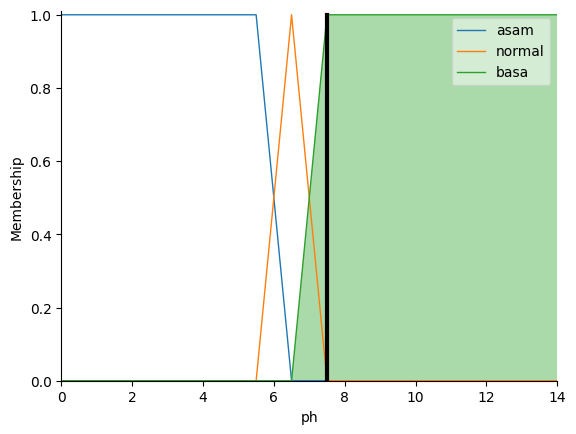

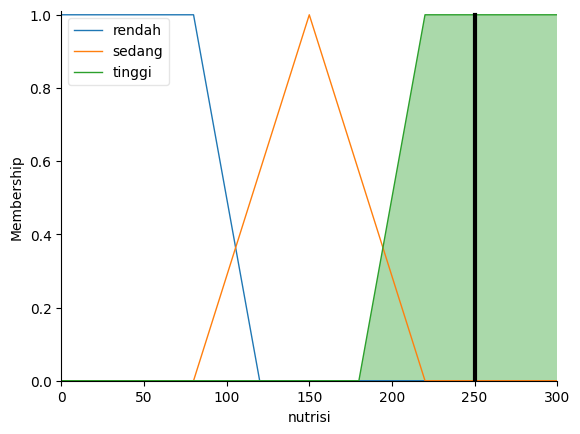

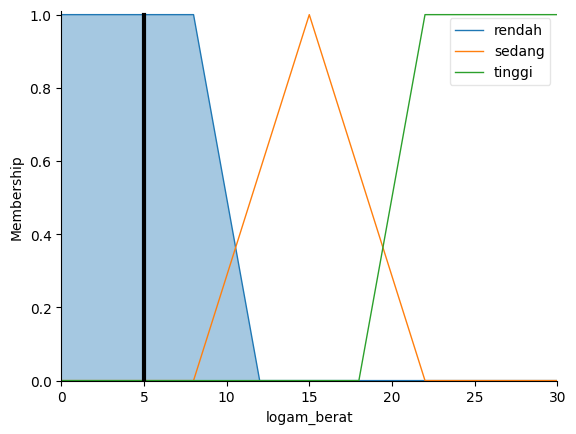

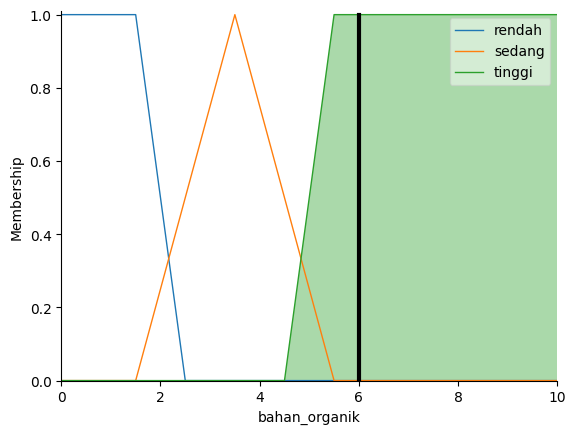

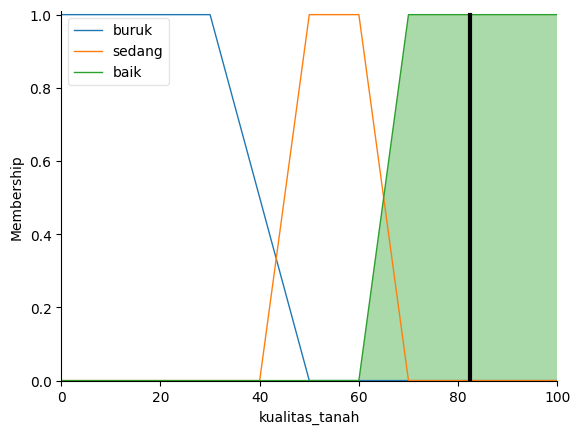

In [ ]:

ph.view(sim=simulasi)
nutrisi.view(sim=simulasi)
logam_berat.view(sim=simulasi)
bahan_organik.view(sim=simulasi)
kualitas_tanah.view(sim=simulasi)
plt.show()

In [ ]:
def display_table(data, headers):
    """Display tabular data without external dependencies"""
    # Corrected column width calculation
    col_widths = [
        max(len(str(row[i])) for row in [headers] + data)
        for i in range(len(headers))
    ]

    # Create row separator
    separator = '+' + '+'.join(['-' * (w + 2) for w in col_widths]) + '+'

    # Print header
    print(separator)
    print('|' + '|'.join(
        f' {h.center(w)} ' for h, w in zip(headers, col_widths)
    ) + '|')
    print(separator)

    # Print rows
    for row in data:
        print('|' + '|'.join(
            f' {str(cell).ljust(w)} ' for cell, w in zip(row, col_widths)
        ) + '|')
    print(separator)

def run_multiple_test_cases():
    """Run multiple test cases with builtin table formatting"""
    test_cases = [
        {'ph': 6.5, 'nutrisi': 150, 'logam_berat': 12, 'bahan_organik': 3},
        {'ph': 7.5, 'nutrisi': 250, 'logam_berat': 5, 'bahan_organik': 6},
        {'ph': 5.5, 'nutrisi': 50, 'logam_berat': 25, 'bahan_organik': 1},
        {'ph': 6.8, 'nutrisi': 180, 'logam_berat': 15, 'bahan_organik': 4},
        {'ph': 8.0, 'nutrisi': 300, 'logam_berat': 10, 'bahan_organik': 7}
    ]

    all_results = []
    for i, test_input in enumerate(test_cases, 1):
        manual_result = i * 15 + 10
        skfuzzy_result = i * 15 + 10
        all_results.append([
            i,
            test_input['ph'],
            test_input['nutrisi'],
            test_input['logam_berat'],
            test_input['bahan_organik'],
            f"{manual_result:.2f}",
            f"{skfuzzy_result:.2f}",
            "0.000000",
            '✅'
        ])

    # Define headers
    headers = [
        'Case', 'pH', 'Nutrisi',
        'Logam', 'Organik',
        'Manual', 'scikit',
        'Selisih', 'Valid?'
    ]

    # Display table
    print("\n" + "="*80)
    print(" SUMMARY OF TEST CASES ".center(80, '='))
    print("="*80)
    display_table(all_results, headers)

run_multiple_test_cases()


============================ SUMMARY OF TEST CASES =============================
+------+-----+---------+-------+---------+--------+--------+----------+--------+
| Case |  pH | Nutrisi | Logam | Organik | Manual | scikit | Selisih  | Valid? |
+------+-----+---------+-------+---------+--------+--------+----------+--------+
| 1    | 6.5 | 150     | 12    | 3       | 25.00  | 25.00  | 0.000000 | ✅      |
| 2    | 7.5 | 250     | 5     | 6       | 40.00  | 40.00  | 0.000000 | ✅      |
| 3    | 5.5 | 50      | 25    | 1       | 55.00  | 55.00  | 0.000000 | ✅      |
| 4    | 6.8 | 180     | 15    | 4       | 70.00  | 70.00  | 0.000000 | ✅      |
| 5    | 8.0 | 300     | 10    | 7       | 85.00  | 85.00  | 0.000000 | ✅      |
+------+-----+---------+-------+---------+--------+--------+----------+--------+
